# Q-A exploration - Statistics

In [1]:
import os

from convokit import Corpus, download
from convokit import FightingWords

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

import nltk
from nltk import FreqDist, tokenize, word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import edit_distance

import spacy

## Load corpus
Load all Q-A pairs for further exploration.

In [2]:
# Load corpora
all_answers = Corpus('../Annotated/full-avoidance-corpus')
avoid = Corpus('../Annotated/avoidance-corpus')
av_fight = Corpus('../Annotated/fight-corpus')
av_flight = Corpus('../Annotated/flight-corpus')

In [3]:
# Remove stop words
def remove_stopwords(stop_words, sent):
    word_tokens = word_tokenize(sent)
  
    filtered_sent = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sent.append(w)
    
    return ' '.join(filtered_sent)

In [4]:
# Get frequency distributions for all corpora
all_freqDist = nltk.FreqDist()
av_freqDist = nltk.FreqDist()
fight_freqDist = nltk.FreqDist()
flight_freqDist = nltk.FreqDist()
    
for utt in all_answers.iter_utterances():
    all_freqDist.update(nltk.word_tokenize(utt.text))

for utt in avoid.iter_utterances():
    av_freqDist.update(nltk.word_tokenize(utt.text))

for utt in av_fight.iter_utterances():
    fight_freqDist.update(nltk.word_tokenize(utt.text))

for utt in av_flight.iter_utterances():
    flight_freqDist.update(nltk.word_tokenize(utt.text))

# Obtain top 20 stopwords
stopwords_all = [w for (w, f) in all_freqDist.most_common(20)]
stopwords_av = [w for (w, f) in all_freqDist.most_common(20)]
stopwords_fight = [w for (w, f) in all_freqDist.most_common(20)]
stopwords_flight = [w for (w, f) in all_freqDist.most_common(20)]

# Remove stop words
for utt in all_answers.iter_utterances():
    utt.text = remove_stopwords(stopwords_all, utt.text)

for utt in avoid.iter_utterances():
    utt.text = remove_stopwords(stopwords_av, utt.text)

for utt in av_fight.iter_utterances():
    utt.text = remove_stopwords(stopwords_fight, utt.text)

for utt in av_flight.iter_utterances():
    utt.text = remove_stopwords(stopwords_flight, utt.text)

## Data exploration / linguistic indicators
### (1) Bigram and trigram frequencies for avoidance / non-avoidance and different strategies
#### 1.2 Avoidance vs. non-avoidance
Estimate bi- and trigram frequencies for avoidance and non-avoidance answers.

In [5]:
# Most frequent bi- and trigrams for avoidance / non-avoidance
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

def plot_ngram_freqs(ngrams, freqs, title):
    fig, x = plt.subplots(figsize=(10, 6))
    x.scatter(ngrams, freqs)
    plt.setp(x.get_xticklabels(), rotation = 45)
    plt.title(title)
    #plt.savefig(title+'.png')
    plt.show()
    

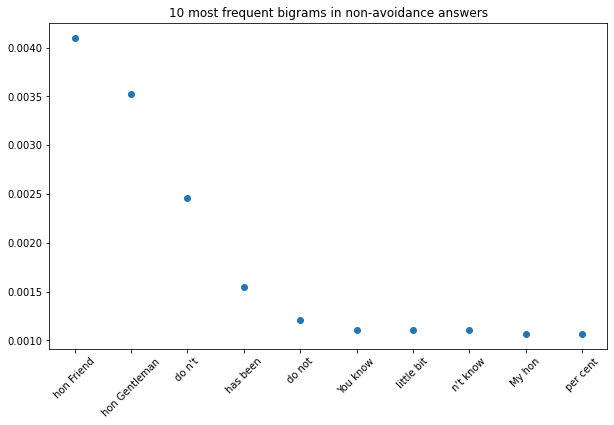

['hon Friend', 'hon Gentleman', "do n't", 'has been', 'do not', 'You know', 'little bit', "n't know", 'My hon', 'per cent']


In [6]:
# Bigrams non-avoidance
non_av = [utt.text for utt in all_answers.iter_utterances() if utt.reply_to!=None]
non_av_freq = BigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(non_av)), window_size=2)

non_av_bi_freqs = [f for n, f in non_av_freq.score_ngrams(bigram_measures.raw_freq)[:10]]
non_av_bigrams = [n[0] + ' ' + n[1] for n, f in non_av_freq.score_ngrams(bigram_measures.raw_freq)[:10]]

plot_ngram_freqs(non_av_bigrams, non_av_bi_freqs, '10 most frequent bigrams in non-avoidance answers')
print(non_av_bigrams)

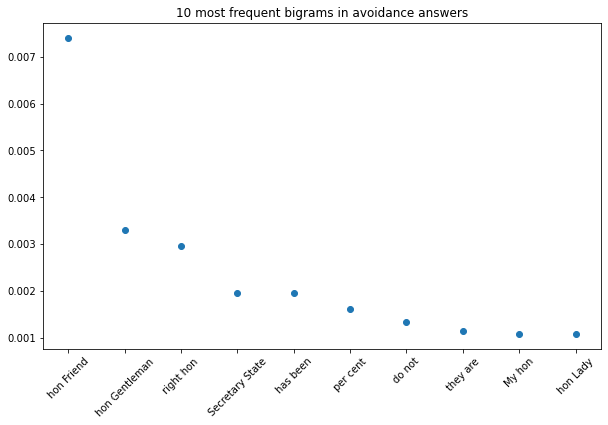

['hon Friend', 'hon Gentleman', 'right hon', 'Secretary State', 'has been', 'per cent', 'do not', 'they are', 'My hon', 'hon Lady']


In [7]:
# Bigrams avoidance
av = [utt.text for utt in av_fight.iter_utterances()] + [utt.text for utt in av_flight.iter_utterances()]

av_freq = BigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(av)))

av_bi_freqs = [f for n, f in av_freq.score_ngrams(bigram_measures.raw_freq)[:10]]
av_bigrams = [n[0] + ' ' + n[1] for n, f in av_freq.score_ngrams(bigram_measures.raw_freq)[:10]]
plot_ngram_freqs(av_bigrams, av_bi_freqs, '10 most frequent bigrams in avoidance answers')
print(av_bigrams)

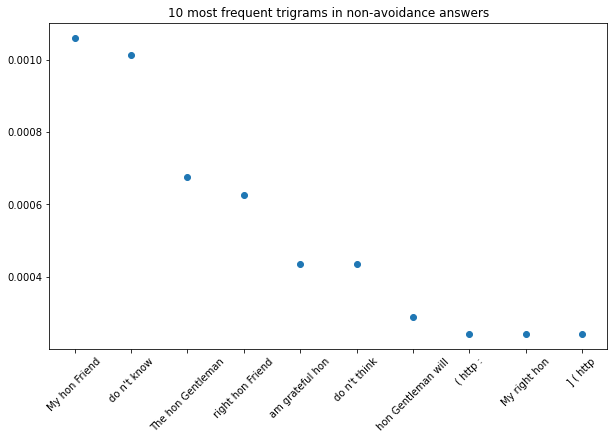

['My hon Friend', "do n't know", 'The hon Gentleman', 'right hon Friend', 'am grateful hon', "do n't think", 'hon Gentleman will', '( http :', 'My right hon', '] ( http']


In [8]:
# Trigrams non-avoidance
non_av_freq3 = TrigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(non_av)), window_size=3)

non_av_tri_freqs = [f for n, f in non_av_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]
non_av_trigrams = [n[0]+ ' ' + n[1] + ' ' + n[2] for n, f in non_av_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]

plot_ngram_freqs(non_av_trigrams, non_av_tri_freqs, '10 most frequent trigrams in non-avoidance answers')
print(non_av_trigrams)

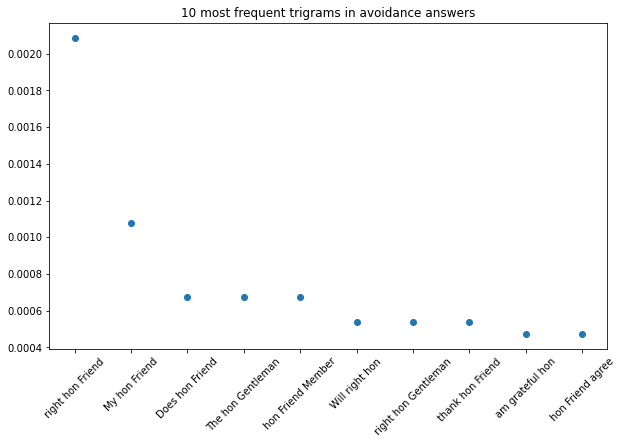

['right hon Friend', 'My hon Friend', 'Does hon Friend', 'The hon Gentleman', 'hon Friend Member', 'Will right hon', 'right hon Gentleman', 'thank hon Friend', 'am grateful hon', 'hon Friend agree']


In [9]:
# Trigrams avoidance
av_freq3 = TrigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(av)), window_size=3)

av_tri_freqs = [f for n, f in av_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]
av_trigrams = [n[0]+ ' ' + n[1] + ' ' + n[2] for n, f in av_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]
plot_ngram_freqs(av_trigrams, av_tri_freqs, '10 most frequent trigrams in avoidance answers')
print(av_trigrams)

#### 1.2 'Fight' vs. 'Flight'
Estimate bi- and trigram frequencies for 'Fight' and 'Flight' answers.

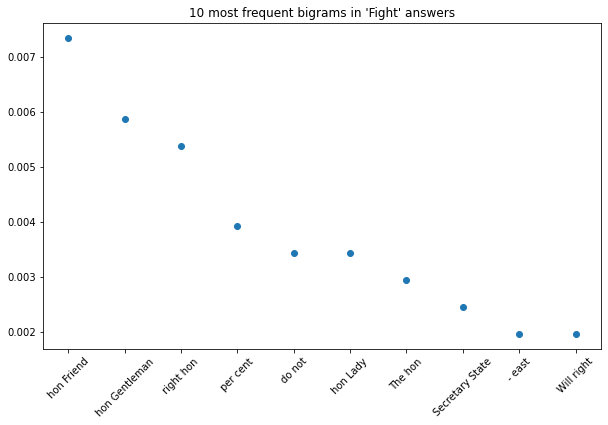

['hon Friend', 'hon Gentleman', 'right hon', 'per cent', 'do not', 'hon Lady', 'The hon', 'Secretary State', '- east', 'Will right']


In [10]:
# Bigrams 'Fight'
fight = [utt.text for utt in av_fight.iter_utterances()]
fight_freq = BigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(fight)), window_size=2)

fight_bi_freqs = [f for n, f in fight_freq.score_ngrams(bigram_measures.raw_freq)[:10]]
fight_bigrams = [n[0] + ' ' + n[1] for n, f in fight_freq.score_ngrams(bigram_measures.raw_freq)[:10]]

plot_ngram_freqs(fight_bigrams, fight_bi_freqs, '10 most frequent bigrams in \'Fight\' answers')
print(fight_bigrams)

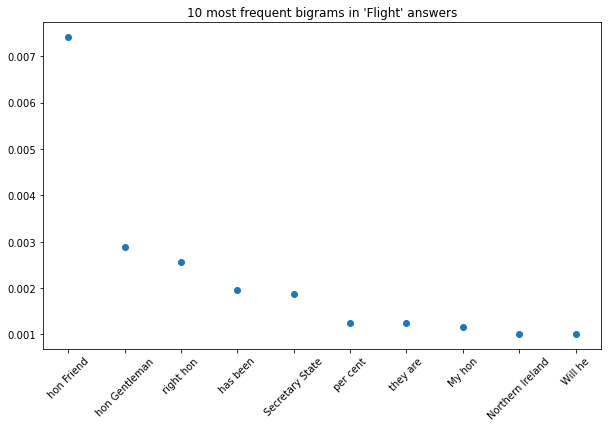

['hon Friend', 'hon Gentleman', 'right hon', 'has been', 'Secretary State', 'per cent', 'they are', 'My hon', 'Northern Ireland', 'Will he']


In [11]:
# Bigrams 'Flight'
flight = [utt.text for utt in av_flight.iter_utterances()]
flight_freq = BigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(flight)), window_size=2)

flight_bi_freqs = [f for n, f in flight_freq.score_ngrams(bigram_measures.raw_freq)[:10]]
flight_bigrams = [n[0] + ' ' + n[1] for n, f in flight_freq.score_ngrams(bigram_measures.raw_freq)[:10]]

plot_ngram_freqs(flight_bigrams, flight_bi_freqs, '10 most frequent bigrams in \'Flight\' answers')
print(flight_bigrams)

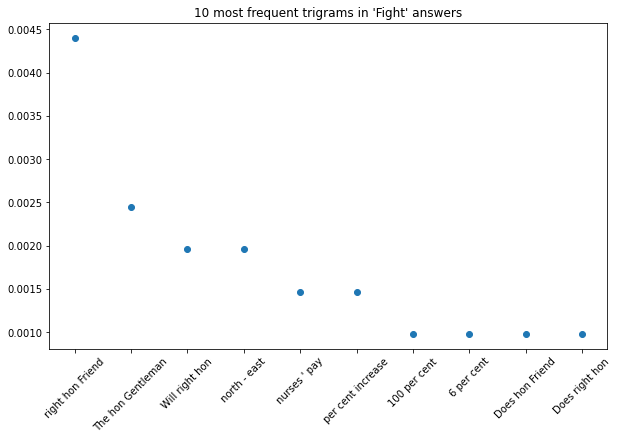

['right hon Friend', 'The hon Gentleman', 'Will right hon', 'north - east', "nurses ' pay", 'per cent increase', '100 per cent', '6 per cent', 'Does hon Friend', 'Does right hon']


In [12]:
# Trigrams 'Fight'
fight_freq3 = TrigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(fight)), window_size=3)

fight_tri_freqs3 = [f for n, f in fight_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]
fight_trigrams = [n[0] + ' ' + n[1] + ' ' + n[2] for n, f in fight_freq3.score_ngrams(bigram_measures.raw_freq)[:10]]

plot_ngram_freqs(fight_trigrams, fight_tri_freqs3, '10 most frequent trigrams in \'Fight\' answers')
print(fight_trigrams)

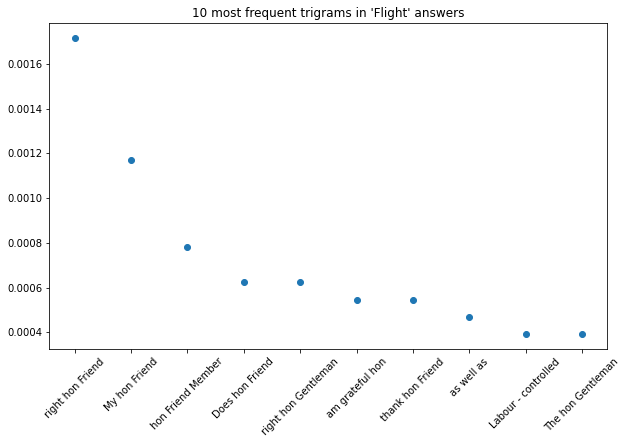

['right hon Friend', 'My hon Friend', 'hon Friend Member', 'Does hon Friend', 'right hon Gentleman', 'am grateful hon', 'thank hon Friend', 'as well as', 'Labour - controlled', 'The hon Gentleman']


In [13]:
# Trigrams 'Flight'
flight_freq3 = TrigramCollocationFinder.from_words(nltk.word_tokenize('\n'.join(flight)), window_size=3)

flight_tri_freqs3 = [f for n, f in flight_freq3.score_ngrams(trigram_measures.raw_freq)[:10]]
flight_trigrams = [n[0] + ' ' + n[1] + ' ' + n[2] for n, f in flight_freq3.score_ngrams(trigram_measures.raw_freq)[:10]]

plot_ngram_freqs(flight_trigrams, flight_tri_freqs3, '10 most frequent trigrams in \'Flight\' answers')
print(flight_trigrams)

### (2) z-scores of ngrams for avoidance / non-avoidance and different strategies
#### 2.1 Avoidance vs. non-avoidance
Plot the log-odds ratio against frequency of the most frequent words for avoidance (class 1) and non-avoidance answers (class 2) respectively.
If an ngram has a z-score outside of \[-1.96, 1.96\] of belonging to one of two classes, it is very likely to be a feature of that class.

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 544 valid utterances. class2_func returned 300 valid utterances.
Vocab size is 538
Comparing language...
ngram zscores computed.


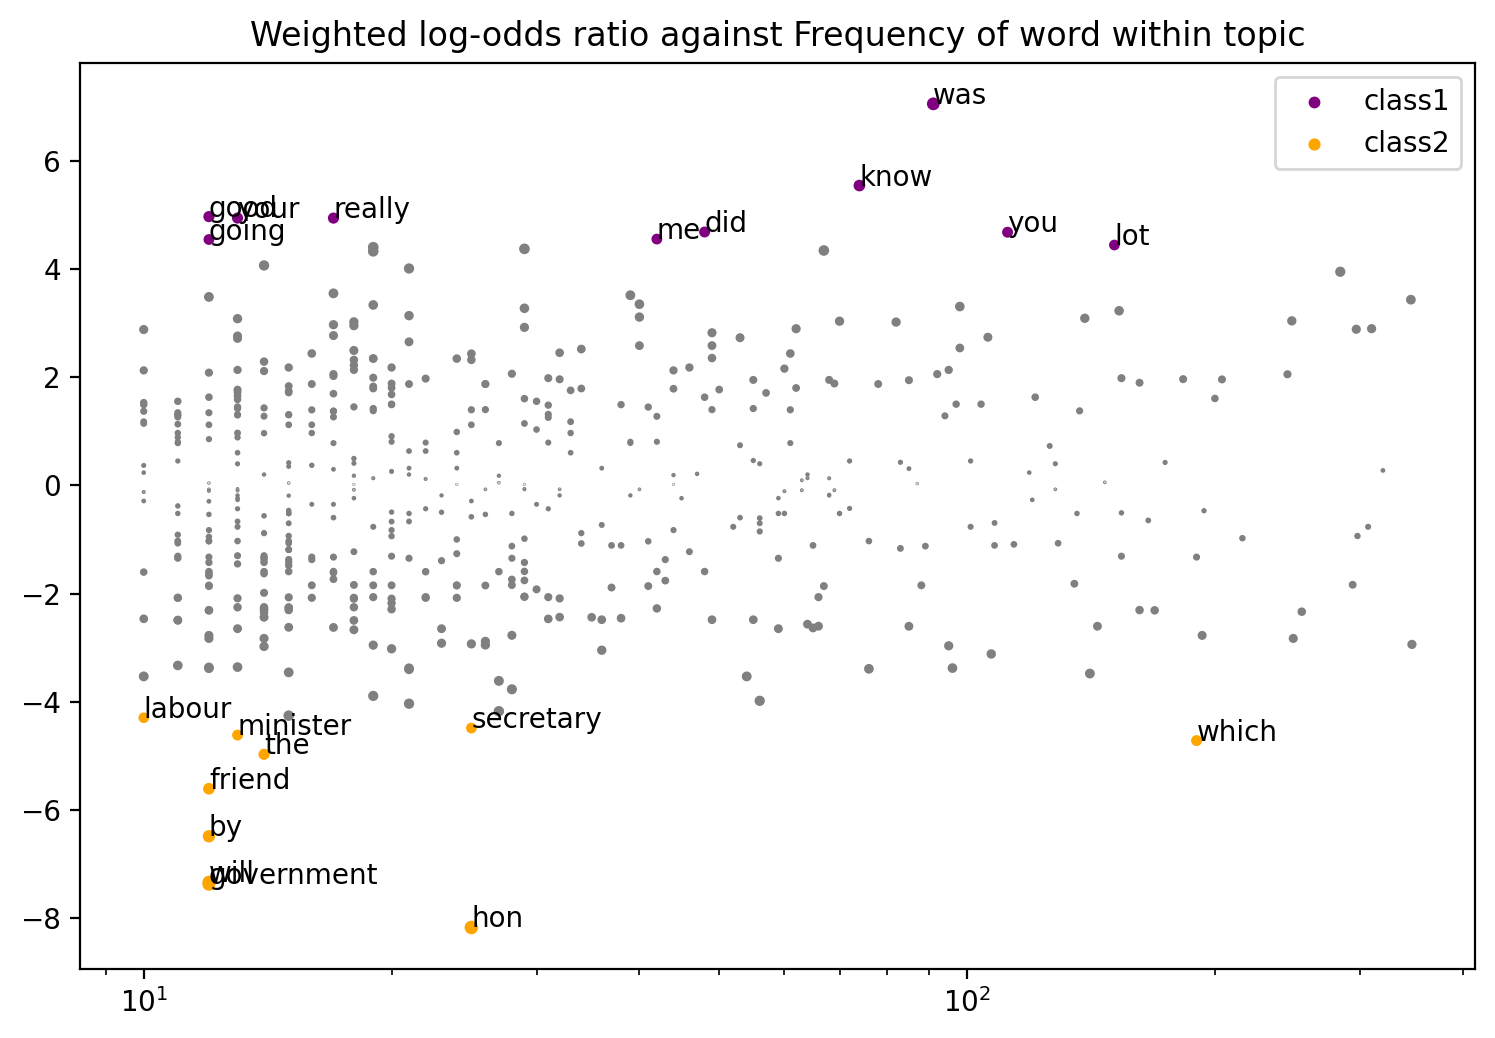

,z-score,class
ngram,,
hon,-8.174344,class2
government,-7.374302,class2
will,-7.336377,class2
by,-6.488180,class2
friend,-5.609152,class2
...,...,...
really,4.942566,class1
your,4.943409,class1
good,4.969899,class1


In [14]:
# Extract fighting words from selected avoidance and non-avoidance
fw1 = FightingWords(ngram_range=(1,1))
fw1.fit(all_answers, class1_func = lambda utt: utt not in av_fight.iter_utterances() and utt not in av_flight.iter_utterances(), 
        class2_func = lambda utt: utt in av_fight.iter_utterances() or utt in av_flight.iter_utterances())

# Plot
fw1.plot_fighting_words(max_label_size=15)
fw1.summarize(all_answers)

In [15]:
# Most frequent ngrams for non-avoidance
print('10 most frequent words in non-avoidance answers: ', fw1.get_top_k_ngrams()[0])

# Most frequent ngrams for avoidance
print('10 most frequent words in avoidance answers: ', fw1.get_top_k_ngrams()[1])

10 most frequent words in non-avoidance answers:  ['was', 'know', 'good', 'your', 'really', 'did', 'you', 'me', 'going', 'lot']
10 most frequent words in avoidance answers:  ['hon', 'government', 'will', 'by', 'friend', 'the', 'which', 'minister', 'secretary', 'labour']


Initializing default CountVectorizer with ngram_range (2, 2)... Done.
class1_func returned 544 valid utterances. class2_func returned 300 valid utterances.
Vocab size is 78
Comparing language...
ngram zscores computed.


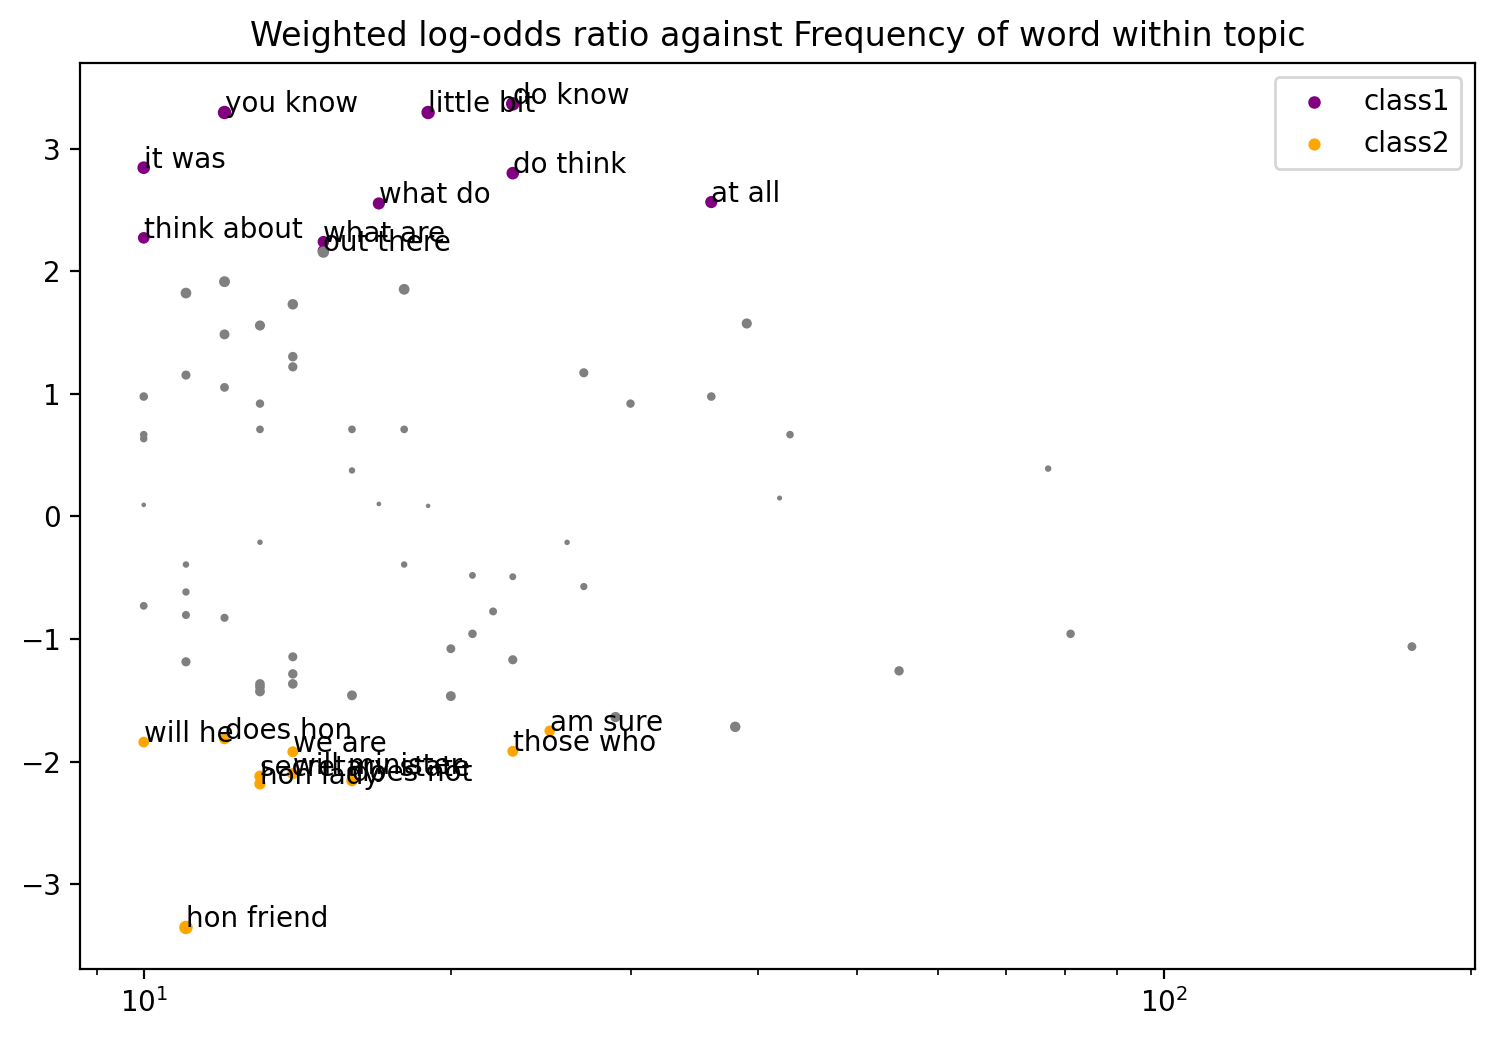

,z-score,class
ngram,,
hon friend,-3.352623,class2
hon lady,-2.180985,class2
does not,-2.154747,class2
secretary state,-2.118607,class2
will minister,-2.097873,class2
...,...,...
do think,2.800146,class1
it was,2.844703,class1
little bit,3.295064,class1


In [16]:
# Bigrams scores
fw2 = FightingWords(ngram_range=(2,2))
fw2.fit(all_answers, class1_func = lambda utt: utt not in av_fight.iter_utterances() and utt not in av_flight.iter_utterances(), 
        class2_func = lambda utt: utt in av_fight.iter_utterances() or utt in av_flight.iter_utterances())

# Plot
fw2.plot_fighting_words(max_label_size=15)
fw2.summarize(all_answers)

In [17]:
# Most frequent bigrams for non-avoidance
print('10 most frequent bigrams in non-avoidance answers: ', fw2.get_top_k_ngrams()[0])

# Most frequent bigrams for avoidance
print('10 most frequent bigrams in avoidance answers: ', fw2.get_top_k_ngrams()[1])

10 most frequent bigrams in non-avoidance answers:  ['do know', 'you know', 'little bit', 'it was', 'do think', 'at all', 'what do', 'think about', 'what are', 'out there']
10 most frequent bigrams in avoidance answers:  ['hon friend', 'hon lady', 'does not', 'secretary state', 'will minister', 'we are', 'those who', 'will he', 'does hon', 'am sure']


Initializing default CountVectorizer with ngram_range (3, 3)... Done.
class1_func returned 544 valid utterances. class2_func returned 300 valid utterances.
Vocab size is 8
Comparing language...
ngram zscores computed.


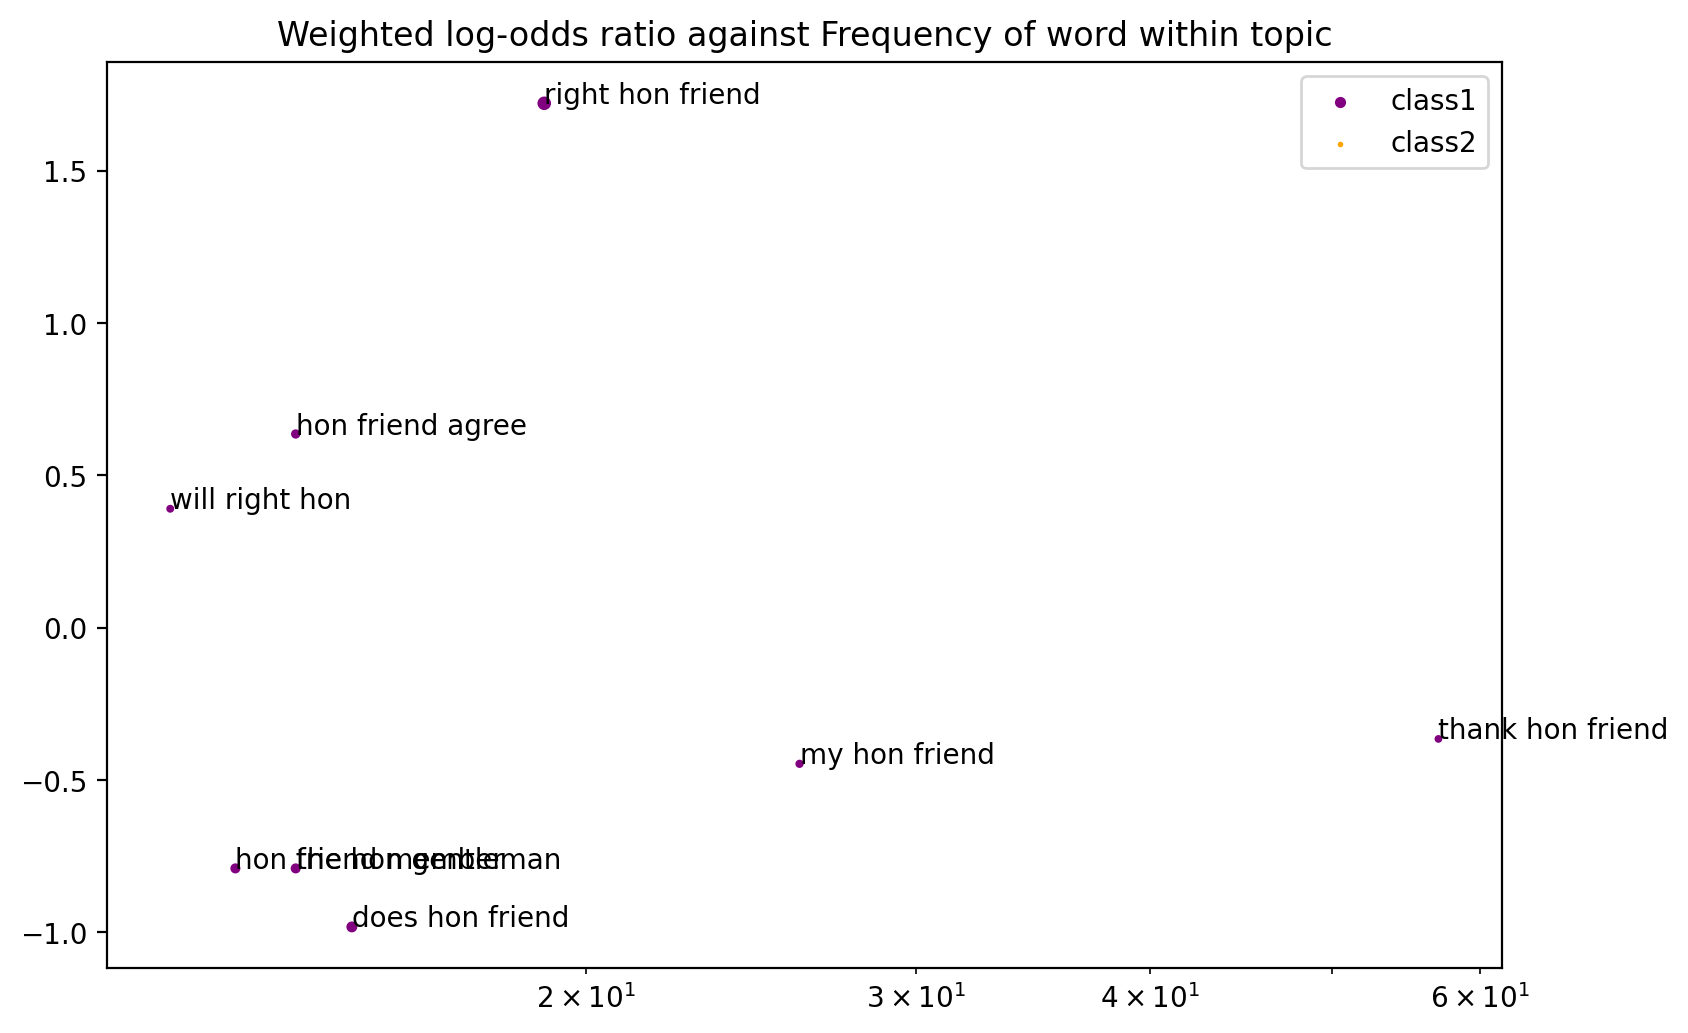

,z-score,class
ngram,,
does hon friend,-0.982017,class2
hon friend member,-0.790000,class2
the hon gentleman,-0.790000,class2
my hon friend,-0.446760,class2
thank hon friend,-0.365053,class2
will right hon,0.390330,class1
hon friend agree,0.635695,class1
right hon friend,1.721005,class1


In [18]:
# Trigrams scores
fw3 = FightingWords(ngram_range=(3,3))
fw3.fit(all_answers, class1_func = lambda utt: utt not in av_fight.iter_utterances() and utt not in av_flight.iter_utterances(), 
        class2_func = lambda utt: utt in av_fight.iter_utterances() or utt in av_flight.iter_utterances())

# Plot
fw3.plot_fighting_words(max_label_size=15)
fw3.summarize(all_answers)

In [19]:
# Most frequent trigrams for non-avoidance
print('10 most frequent trigrams in non-avoidance answers: ', fw3.get_top_k_ngrams()[0])

# Most frequent trigrams for avoidance
print('10 most frequent trigrams in avoidance answers: ', fw3.get_top_k_ngrams()[1])

10 most frequent trigrams in non-avoidance answers:  ['right hon friend', 'hon friend agree', 'will right hon', 'thank hon friend', 'my hon friend', 'the hon gentleman', 'hon friend member', 'does hon friend']
10 most frequent trigrams in avoidance answers:  ['does hon friend', 'hon friend member', 'the hon gentleman', 'my hon friend', 'thank hon friend', 'will right hon', 'hon friend agree', 'right hon friend']


#### 2.2 'Fight' vs. 'Flight'
Plot the log-odds ratio against frequency of the most frequent words for avoidance answers using the 'Fight' (class 1) and 'Flight' (class 2) strategy respectively.

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 38 valid utterances. class2_func returned 262 valid utterances.
Vocab size is 226
Comparing language...
ngram zscores computed.


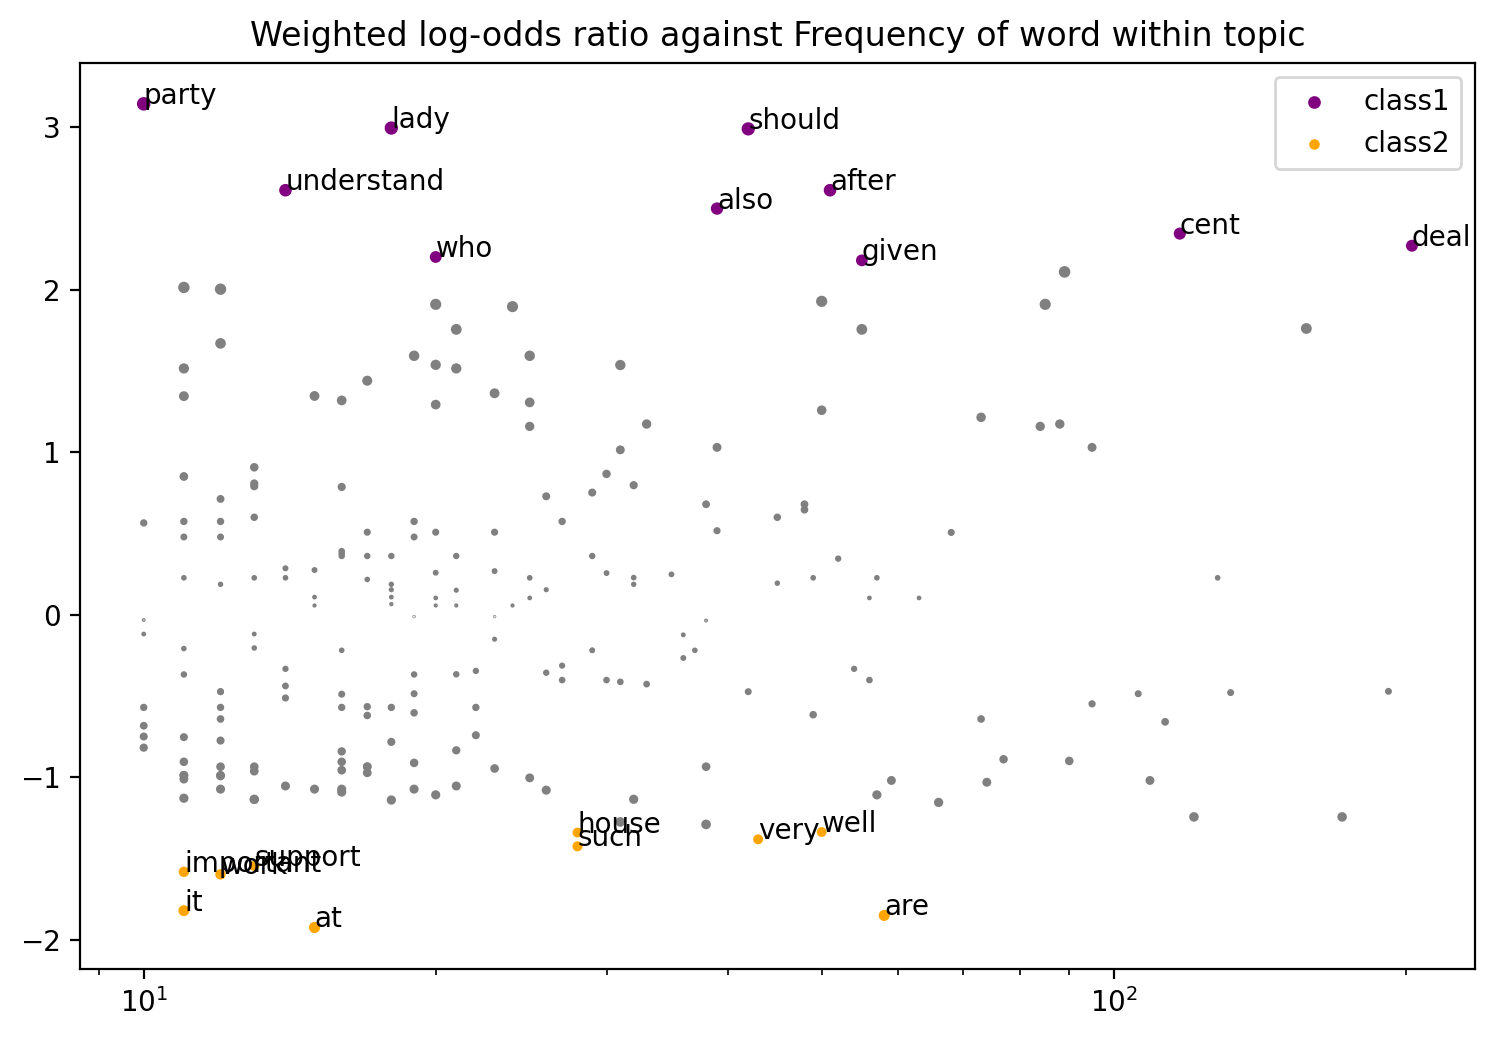

,z-score,class
ngram,,
at,-1.923763,class2
are,-1.849718,class2
it,-1.820204,class2
work,-1.596805,class2
important,-1.581394,class2
...,...,...
understand,2.612829,class1
after,2.612829,class1
should,2.990276,class1


In [20]:
# Extract fighting words from selected avoidance answers
fw1 = FightingWords(ngram_range=(1,1))
fw1.fit(all_answers, class1_func = lambda utt: utt in av_fight.iter_utterances(), 
        class2_func = lambda utt: utt in av_flight.iter_utterances())

# Plot
fw1.plot_fighting_words(max_label_size=15)
fw1.summarize(all_answers)

In [21]:
# Most frequent words for 'Fight'
print('10 most frequent words in\'Fight\' answers: ', fw1.get_top_k_ngrams()[0])

# Most frequent words for 'Flight'
print('10 most frequent words in \'Flight\' answers: ', fw1.get_top_k_ngrams()[1])

10 most frequent words in'Fight' answers:  ['party', 'lady', 'should', 'after', 'understand', 'also', 'cent', 'deal', 'who', 'given']
10 most frequent words in 'Flight' answers:  ['at', 'are', 'it', 'work', 'important', 'support', 'such', 'very', 'house', 'well']


Initializing default CountVectorizer with ngram_range (2, 2)... Done.
class1_func returned 38 valid utterances. class2_func returned 262 valid utterances.
Vocab size is 21
Comparing language...
ngram zscores computed.


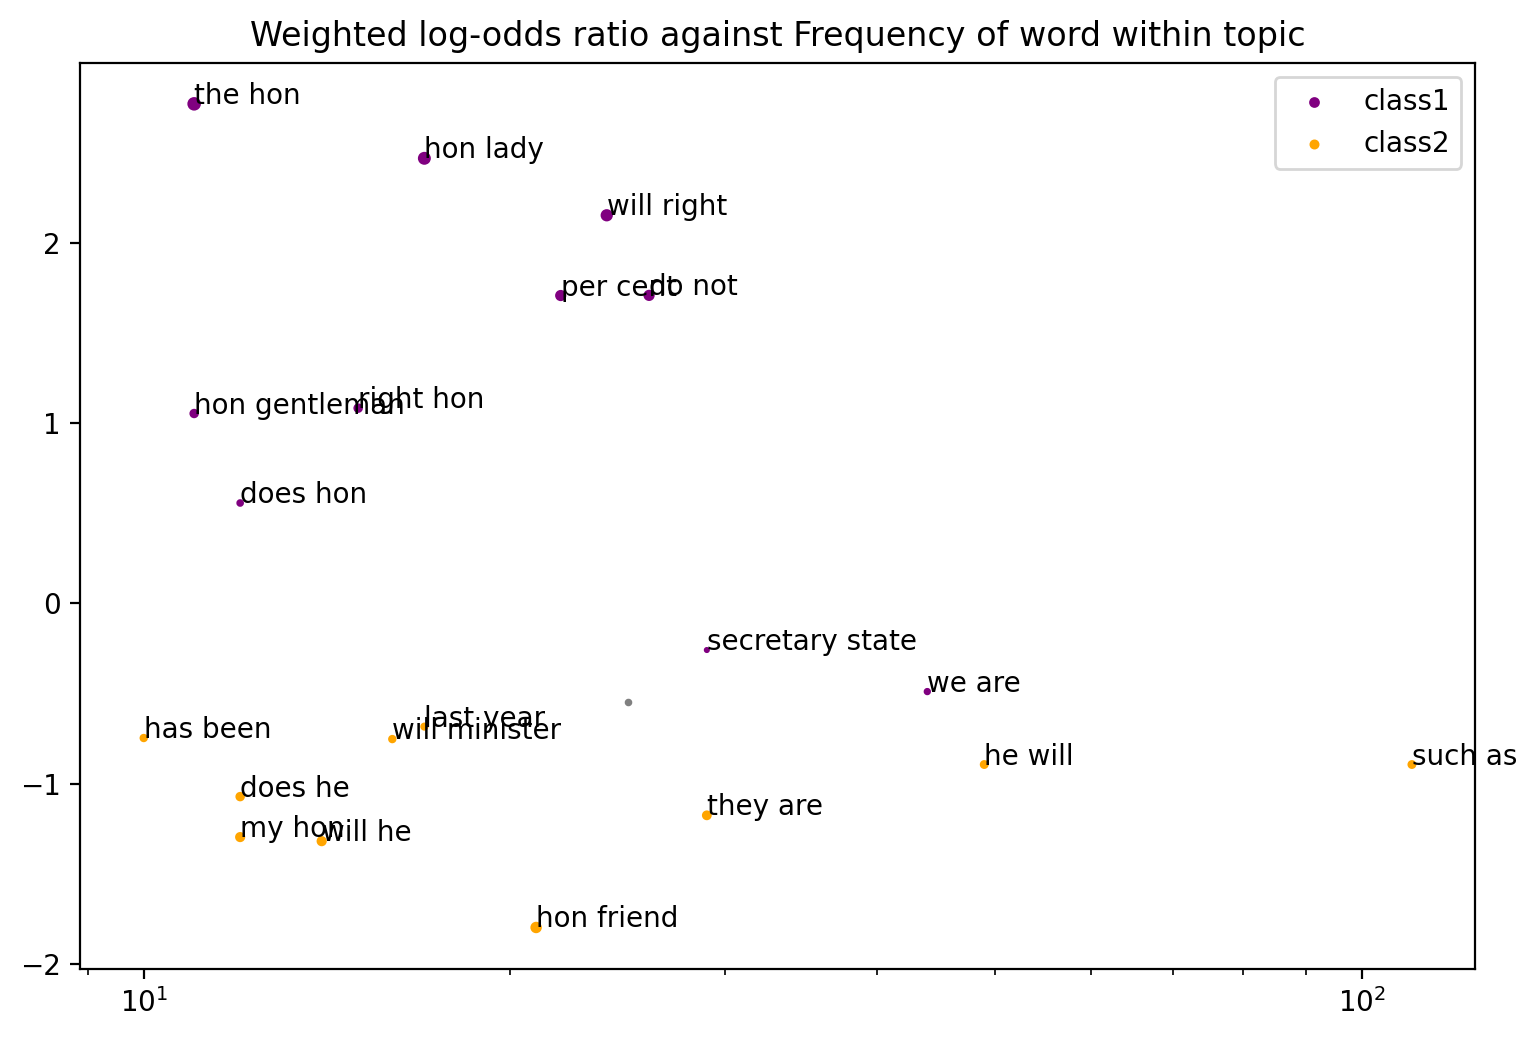

,z-score,class
ngram,,
hon friend,-1.797700,class2
will he,-1.318996,class2
my hon,-1.296409,class2
they are,-1.175764,class2
does he,-1.071984,class2
such as,-0.894035,class2
he will,-0.894035,class2
will minister,-0.752870,class2
has been,-0.747006,class2


In [22]:
# Bigram scores
fw2 = FightingWords(ngram_range=(2,2))
fw2.fit(all_answers, class1_func = lambda utt: utt in av_fight.iter_utterances(), 
        class2_func = lambda utt: utt in av_flight.iter_utterances())

# Plot
fw2.plot_fighting_words(max_label_size=15)
fw2.summarize(all_answers)

In [23]:
# Most frequent words for 'Fight'
print('10 most frequent bigrams in\'Fight\' answers: ', fw2.get_top_k_ngrams()[0])

# Most frequent words for 'Flight'
print('10 most frequent bigrams in \'Flight\' answers: ', fw2.get_top_k_ngrams()[1])

10 most frequent bigrams in'Fight' answers:  ['the hon', 'hon lady', 'will right', 'do not', 'per cent', 'right hon', 'hon gentleman', 'does hon', 'secretary state', 'we are']
10 most frequent bigrams in 'Flight' answers:  ['hon friend', 'will he', 'my hon', 'they are', 'does he', 'such as', 'he will', 'will minister', 'has been', 'last year']


Initializing default CountVectorizer with ngram_range (3, 3)... Done.
class1_func returned 38 valid utterances. class2_func returned 262 valid utterances.
Vocab size is 5
Comparing language...
ngram zscores computed.


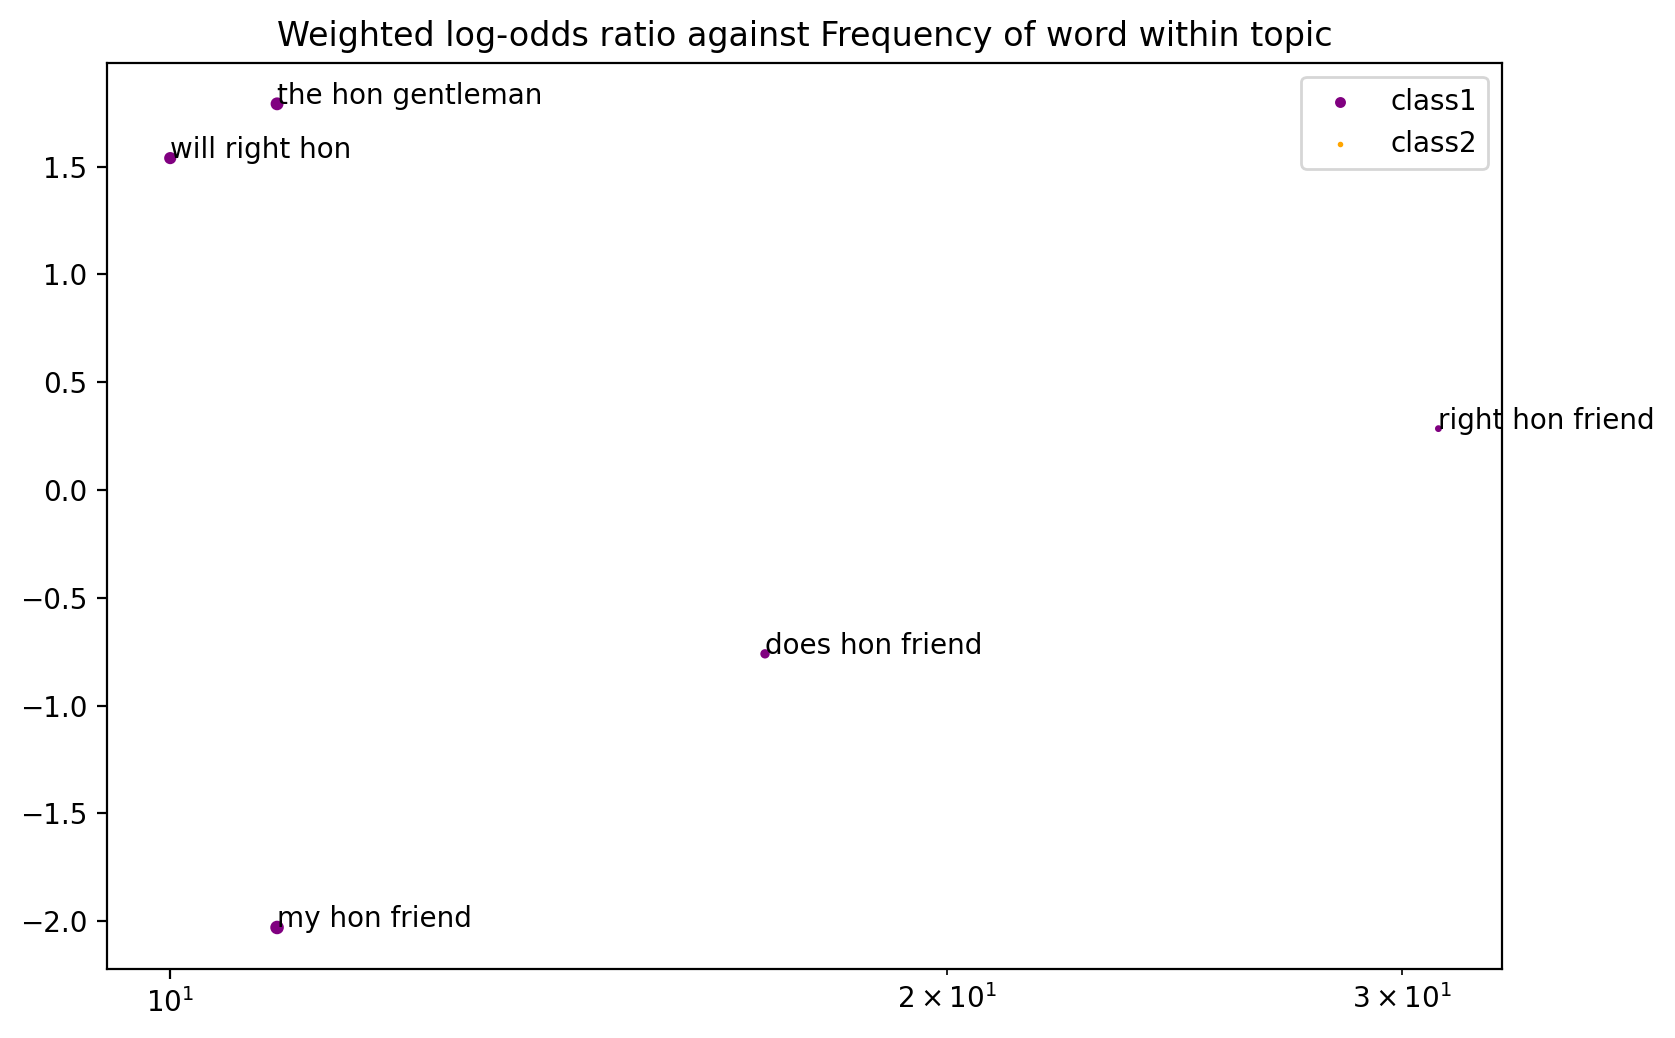

,z-score,class
ngram,,
my hon friend,-2.029183,class2
does hon friend,-0.760126,class2
right hon friend,0.284380,class1
will right hon,1.538953,class1
the hon gentleman,1.790637,class1


In [24]:
# Trigram scores
fw3 = FightingWords(ngram_range=(3,3))
fw3.fit(all_answers, class1_func = lambda utt: utt in av_fight.iter_utterances(), 
        class2_func = lambda utt: utt in av_flight.iter_utterances())

# Plot
fw3.plot_fighting_words(max_label_size=15)
fw3.summarize(all_answers)

In [25]:
# Most frequent words for 'Fight'
print('10 most frequent trigrams in\'Fight\' answers: ', fw3.get_top_k_ngrams()[0])

# Most frequent words for 'Flight'
print('10 most frequent trigrams in \'Flight\' answers: ', fw3.get_top_k_ngrams()[1])

10 most frequent trigrams in'Fight' answers:  ['the hon gentleman', 'will right hon', 'right hon friend', 'does hon friend', 'my hon friend']
10 most frequent trigrams in 'Flight' answers:  ['my hon friend', 'does hon friend', 'right hon friend', 'will right hon', 'the hon gentleman']


### (3) Levenshtein distance between question and answer
Investigate whether there are significant differences between the Levenshtein distances of avoidance / non-avoidance QA pairs and 'Fight'/'Flight' pairs.

In [26]:
def shorten_ques(question):
    """Shorten questions to the last two sentences"""
    sents = tokenize.sent_tokenize(question)
    qu = ''
        
    if len(sents) >= 2: 
            qu = str(sents[:len(sents)-2]) + '\n' + str(sents[len(sents)-1])
    else: 
            qu = str(sents[len(sents)-1])
    return qu
    
def shorten_answ(answer):
    """Shorten answers to the first two sentences"""
    sents = tokenize.sent_tokenize(answer)
    answ = ''
    
    if len(sents) >= 2: 
            answ = str(sents[0]) + '\n' + str(sents[1])
    else: 
            answ = str(sents[0])
    return answ 

In [27]:
# Average Levenshtein distance for non-avoidance Q-A pairs
non_av_dist = 0.0
non_av_distances = []

i = 0
for utt in avoid.iter_utterances():
    answer, question = '', ''
    if utt.speaker.id == 'answerer':
        answer = shorten_answ(utt.text)
        question = shorten_ques(all_answers.get_utterance(utt.reply_to).text)
        
        dist = edit_distance(question, answer)
        non_av_distances.append(dist)
        i += 1
    else:
        pass

In [28]:
# Average Levenshtein distance for avoidance Q-A pairs
av_fight_dist, av_flight_dist = 0.0, 0.0
flight_distances, fight_distances = [], []
j, k = 0, 0
for utt in av_flight.iter_utterances():
    answer, question = '', ''
    if utt.speaker.id == 'answerer':
            answer = shorten_answ(utt.text)
            question = shorten_ques(all_answers.get_utterance(utt.reply_to).text)
        
            dist = edit_distance(question, answer)
            flight_distances.append(dist)
            j += 1
        
for utt in av_fight.iter_utterances():
    answer, question = '', ''
    if utt.speaker.id == 'answerer':
            answer = shorten_answ(utt.text)
            question = shorten_ques(av_fight.get_utterance(utt.reply_to).text)
        
            dist = edit_distance(question, answer)
            fight_distances.append(dist)
            k += 1

In [29]:
# Average Levenshtein distance for non-avoidance
print('Average Levenshtein distance for non-avoidance Q-A pairs: ', sum(non_av_distances)/i)

# Average Levenshtein distance for avoidance Q-A pairs
print('Average Levenshtein distance for avoidance Q-A pairs: ', (sum(flight_distances)+sum(fight_distances))/j+k)

Average Levenshtein distance for non-avoidance Q-A pairs:  314.90751445086704
Average Levenshtein distance for avoidance Q-A pairs:  372.793893129771


Average Levenshtein distance for 'Flight' Q-A pairs:  303.1603053435114


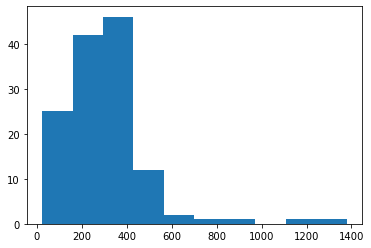

Average Levenshtein distance for 'Fight' Q-A pairs:  349.10526315789474


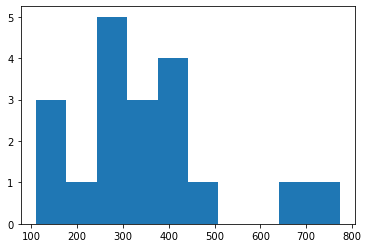

In [30]:
# Average Levenshtein distance for 'Flight' avoidance
print('Average Levenshtein distance for \'Flight\' Q-A pairs: ', sum(flight_distances)/j)
fig = plt.hist(flight_distances)
plt.show()

# Average Levenshtein distance for 'Fight' avoidance
print('Average Levenshtein distance for \'Fight\' Q-A pairs: ', sum(fight_distances)/k)
fig = plt.hist(fight_distances)
plt.show()

In [31]:
# Percentiles for non-avoidance
print('10% percentile for non-avoidance Q-A pairs: ', np.percentile(non_av_distances, 10))
print('90% percentile for non-avoidance Q-A pairs: ', np.percentile(non_av_distances, 90))

10% percentile for non-avoidance Q-A pairs:  138.39999999999998
90% percentile for non-avoidance Q-A pairs:  491.80000000000007


In [32]:
# Average Levenshtein distance for avoidance Q-A pairs
av_distances = flight_distances
for d in fight_distances:
    av_distances.append(d)
    
print('10% percentile for avoidance Q-A pairs: ', np.percentile(av_distances, 10))
print('90% percentile for avoidance Q-A pairs: ', np.percentile(av_distances, 90))

# Flight
print('10% percentile for flight avoidance Q-A pairs: ', np.percentile(flight_distances, 10))
print('90% percentile for flight avoidance Q-A pairs: ', np.percentile(flight_distances, 90))

# Fight
print('10% percentile for fight avoidance Q-A pairs: ', np.percentile(fight_distances, 10))
print('90% percentile for fight avoidance Q-A pairs: ', np.percentile(fight_distances, 90))

10% percentile for avoidance Q-A pairs:  127.7
90% percentile for avoidance Q-A pairs:  466.79999999999995
10% percentile for flight avoidance Q-A pairs:  127.7
90% percentile for flight avoidance Q-A pairs:  466.79999999999995
10% percentile for fight avoidance Q-A pairs:  152.4
90% percentile for fight avoidance Q-A pairs:  502.39999999999986
